In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv("seoulbikedata.csv", encoding='latin1')

In [4]:
training_data_len = int(len(bike) * 0.8)
test_data_len = len(bike) - training_data_len

training_data = bike[:training_data_len]
test_data = bike[training_data_len + 1:]

In [43]:
#checking for the number of unique values
#checkinf for the number of nan in each column
for col in bike.columns:
    print(bike[col].unique()[:5])
    print(bike[col].nunique())
    print(bike[col].isna().sum())

['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017']
365
0
[254 204 173 107  78]
2166
0
[0 1 2 3 4]
24
0
[-5.2 -5.5 -6.  -6.2 -6.4]
546
0
[37 38 39 40 36]
90
0
[2.2 0.8 1.  0.9 2.3]
65
0
[2000 1928 1996 1936  793]
1789
0
[-17.6 -17.7 -18.6 -18.7 -19.5]
556
0
[0.   0.01 0.23 0.65 0.94]
345
0
[0.  0.5 1.  2.5 0.1]
61
0
[0.  0.1 0.3 0.4 0.2]
51
0
['Winter' 'Spring' 'Summer' 'Autumn']
4
0
['No Holiday' 'Holiday']
2
0
['Yes' 'No']
2
0


In [27]:
bike_shuffled = bike.sample(frac=1, random_state=42)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6056,10/08/2018,1728,8,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,Summer,No Holiday,Yes
5556,20/07/2018,822,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,Summer,No Holiday,Yes
5990,07/08/2018,658,14,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,Summer,No Holiday,Yes
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
3319,18/04/2018,1083,7,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,27/07/2018,1507,22,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,Summer,No Holiday,Yes
5191,05/07/2018,828,7,23.5,90,0.5,445,21.7,0.05,0.5,0.0,Summer,No Holiday,Yes
5390,13/07/2018,999,14,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,Summer,No Holiday,Yes
860,05/01/2018,322,20,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#setting up the validation framework

n = len(bike)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_val+n_test+n_train)

8760 8760


In [30]:
#rest_index reassigns the index after reshuffling the dataframe
bike_val = bike_shuffled[: n_val].reset_index(drop = True)
bike_test = bike_shuffled[n_val : n_val + n_test].reset_index(drop = True)
bike_train = bike_shuffled[n_val + n_test:].reset_index(drop = True)

In [32]:
#after reshuffling and scattering the index, re-ordering the index
bike_train


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/06/2018,2094,18,29.8,35,3.3,1805,12.6,1.15,0.0,0.0,Summer,No Holiday,Yes
1,22/04/2018,578,1,15.9,39,0.2,2000,1.9,0.00,0.0,0.0,Spring,No Holiday,Yes
2,05/09/2018,2468,19,25.4,55,3.2,2000,15.6,0.15,0.0,0.0,Autumn,No Holiday,Yes
3,21/08/2018,1112,16,30.4,53,2.0,1990,19.7,1.82,0.0,0.0,Summer,No Holiday,Yes
4,12/02/2018,33,4,-8.6,31,3.5,2000,-22.7,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,27/07/2018,1507,22,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,Summer,No Holiday,Yes
5252,05/07/2018,828,7,23.5,90,0.5,445,21.7,0.05,0.5,0.0,Summer,No Holiday,Yes
5253,13/07/2018,999,14,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,Summer,No Holiday,Yes
5254,05/01/2018,322,20,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,Winter,No Holiday,Yes


In [56]:
def train_linear_regression(X, Y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(Y)
    
    return w_full[0], w_full[1:]
                   

In [68]:
#filter only features that are numerical
# bike_train_int = bike_train.select_dtypes(include=["int64", "float64"])
# bike_test_int = bike_test.select_dtypes(include=["int64", "float64"])
# bike_val_int = bike_val.select_dtypes(include=["int64", "float64"])

base = ["Hour","Temperature(°C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)",
        "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

X_train = bike_train[base].values
X_test = bike_test[base].values
X_val = bike_val[base].values

Y_train = bike_train['Rented Bike Count'].values

In [59]:
w0, w = train_linear_regression(X_train, Y_train)

In [60]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

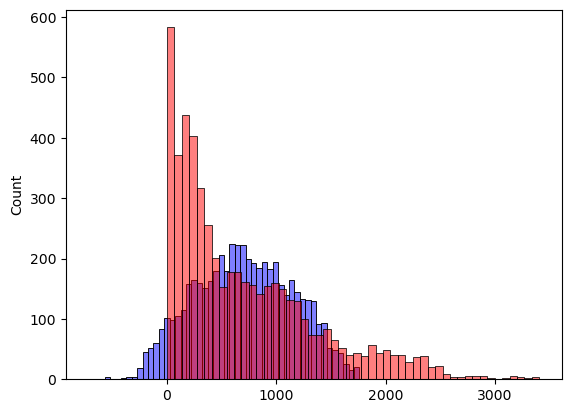

In [67]:
sns.histplot(y_pred, color = "blue", alpha = 0.5, bins = 50)
sns.histplot(Y_train,color = "red", alpha = 0.5, bins = 50)

In [75]:
#computing the RMSE
def rmse(ytrain, ypred):
    error = ytrain - ypred
    sq = error ** 2
    meansq = sq.mean()
    return np.sqrt(meansq)

In [76]:
rmse(Y_train, y_pred)

465.3996313241628